# Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

## Q1 Delivery Time

In [2]:
dt=pd.read_csv("/delivery_time.csv")
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


Delivery Time(y) ~ Sorting Time(x)

In [3]:
#renaming the columns
dt = dt.rename(columns={"Delivery Time": "Delivery", "Sorting Time": "Sorting"})

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Delivery  21 non-null     float64
 1   Sorting   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
dt.describe()

,Delivery,Sorting
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
dt.corr()

,Delivery,Sorting
Delivery,1.000000,0.825997
Sorting,0.825997,1.000000


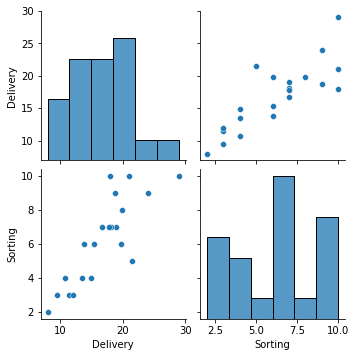

In [7]:
sns.pairplot(dt);

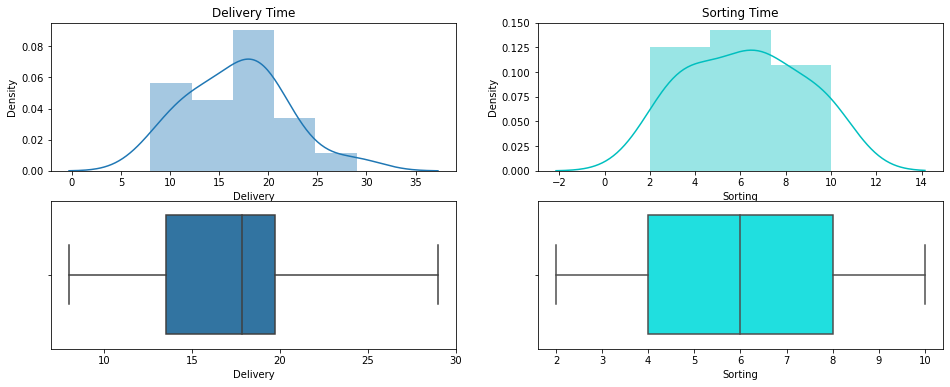

In [8]:
fig = plt.figure(figsize=(16,6))

plt.subplot(2,2,1)
sns.distplot(dt["Delivery"])
plt.title("Delivery Time")

plt.subplot(2,2,2)
sns.distplot(dt["Sorting"],color="c")
plt.title("Sorting Time")

plt.subplot(2,2,3)
sns.boxplot(dt["Delivery"])

plt.subplot(2,2,4)
sns.boxplot(dt["Sorting"],color="aqua");

Both the variables are nearly normally distributed

In [9]:
# Fitting a Linear Regression Model
model = smf.ols("Delivery~Sorting",data = dt).fit()

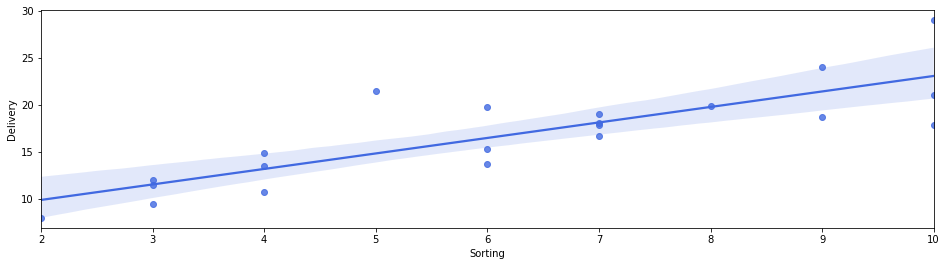

In [10]:
#visualizing the best fit line
fig = plt.figure(figsize=(16,4))
sns.regplot(x="Sorting", y="Delivery", data=dt,color="royalblue");

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        16:39:39   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sorting        1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#Coefficients i.e ß0->intercept and ß1->sorting
model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [13]:
#t and p-Values (2-Tail) ->> h0:ß1=0 ; h1:ß1≠0
print("t values-","\n",model.tvalues,"\n","\n","p values-","\n", model.pvalues)  

t values- 
 Intercept    3.823349
Sorting      6.387447
dtype: float64 
 
 p values- 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


**Assumptions & Test**                                                   
**ß0 = Intercept = 6.582734**                                                     
**ß1 = Sorting    = 1.649020**                                          
**p value for Intercept = 0.001147**                                                   
**p value for Sorting    = 0.000004**                                                   
assuming the significance level is 5% and confidence level 95%                                                           
∴ **α** = 5/100=0.05                                         
Null Hypothesis(**h0**)      -> **ß1=0**                                                                                       
Alternate Hypothesis(**h1**) -> **ß1≠0**                                      
both the p values are less than alpha value i.e **p<α**                                                         
**Which means reject the Null Hypothesis(h0) and accept the alternate Hypothesis(h1)**                         
**∴ This proves that the Sorting(ß1) i.e slope is not zero and Delivery(y) is Independent.**

In [14]:
#R squared values
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

Model rsquare and adjrsquare values are approximately around 0.6 which shows a good model.

#### Predict for new data point

In [15]:
#Prediction with a new data series
newdata=pd.Series([13,14])

In [16]:
paper=pd.DataFrame(newdata,columns=["Sorting"])
paper

,Sorting
0,13
1,14


In [17]:
# predicted y^ values based on previous model
model.predict(paper)   

0    28.019993
1    29.669013
dtype: float64

In [18]:
#to check the correct value manually
# y^= ß0+ß1x ->> y^= 6.582734 +(1.64902*x) 
6.582734+(1.649020*13), 6.582734+(1.649020*14)  

(28.019993999999997, 29.669013999999997)

The values matched for both.Hence,the model can be use for prediction.

## Q2 Salary Hike

In [19]:
sh=pd.read_csv("/Salary_Data.csv")
sh.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Salary(y) ~ YearsExperience(x)

In [20]:
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [21]:
sh.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [22]:
sh.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


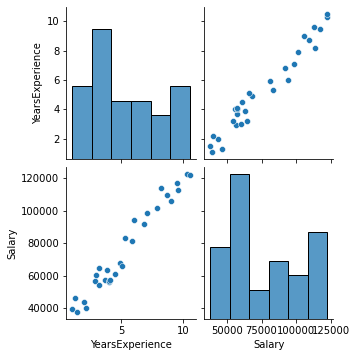

In [23]:
sns.pairplot(sh);

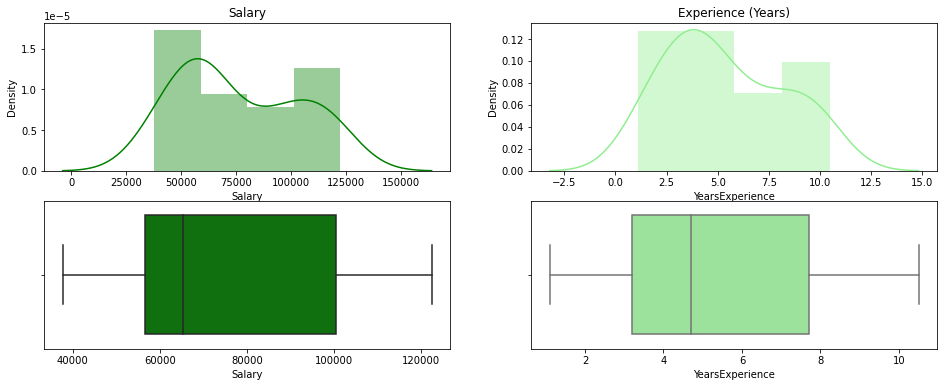

In [24]:
fig = plt.figure(figsize=(16,6))

plt.subplot(2,2,1)
sns.distplot(sh["Salary"],color="g")
plt.title("Salary")

plt.subplot(2,2,2)
sns.distplot(sh["YearsExperience"],color="lightgreen")
plt.title("Experience (Years)")

plt.subplot(2,2,3)
sns.boxplot(sh["Salary"],color="g")

plt.subplot(2,2,4)
sns.boxplot(sh["YearsExperience"],color="lightgreen");

Both the variables are not normally distributed so we need to transform the data.            
Applying **Square Root transformation** on **YearsExperience** to normalise the data.

In [25]:
xsr=np.sqrt(sh["YearsExperience"])
Trans = pd.DataFrame({'t_YearsExperience':xsr})
Trans.head()

,t_YearsExperience
0,1.048809
1,1.140175
2,1.224745
3,1.414214
4,1.483240


In [26]:
#merging transform data with original data
sh= pd.concat([sh,Trans],axis = 1)
sh.head()

,YearsExperience,Salary,t_YearsExperience
0,1.1,39343.0,1.048809
1,1.3,46205.0,1.140175
2,1.5,37731.0,1.224745
3,2.0,43525.0,1.414214
4,2.2,39891.0,1.483240


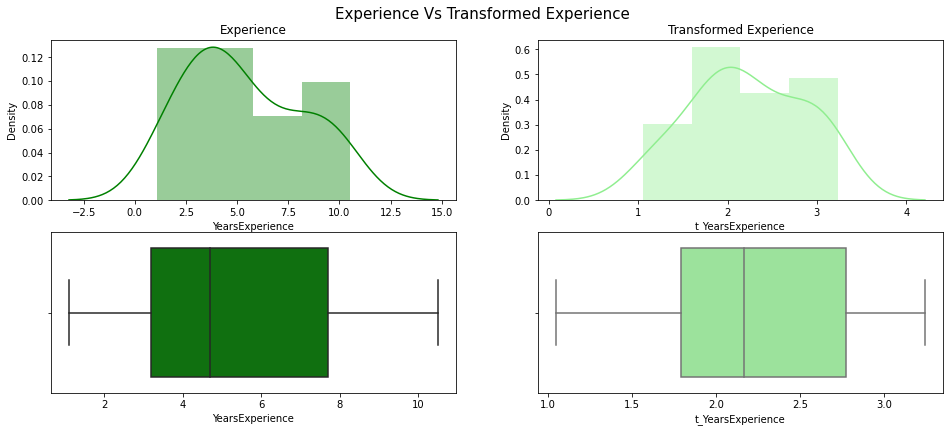

In [27]:
#comparing results after transformation
fig = plt.figure(figsize=(16,6.5))
plt.suptitle('Experience Vs Transformed Experience', size=15, y=.95) 

plt.subplot(2,2,1)
sns.distplot(sh["YearsExperience"],color="g")
plt.title("Experience")

plt.subplot(2,2,2)
sns.distplot(sh["t_YearsExperience"],color="lightgreen")
plt.title("Transformed Experience")

plt.subplot(2,2,3)
sns.boxplot(sh["YearsExperience"],color="g")

plt.subplot(2,2,4)
sns.boxplot(sh["t_YearsExperience"],color="lightgreen");

we can see that the data has improved compared to earlier with the help of transformation and the distribution is nearly normalised.

In [28]:
# Fitting a Linear Regression Model
model = smf.ols("Salary~t_YearsExperience",data = sh).fit()

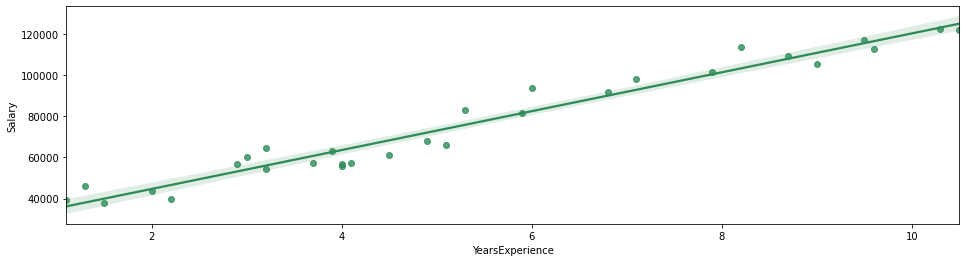

In [29]:
#visualizing the best fit line
fig = plt.figure(figsize=(16,4))
sns.regplot(x="YearsExperience", y="Salary", data=sh,color="seagreen");

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           8.57e-18
Time:                        16:39:43   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
t_YearsExperience   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#Coefficients i.e ß0->intercept and ß1->Experience
model.params

Intercept           -16055.769117
t_YearsExperience    41500.680583
dtype: float64

In [32]:
#t and p-Values (2-Tail) ->> h0:ß1=0 ; h1:ß1≠0
print("t values-","\n",model.tvalues,"\n","\n","p values-","\n", model.pvalues)  

t values- 
 Intercept            -3.262308
t_YearsExperience    19.437148
dtype: float64 
 
 p values- 
 Intercept            2.906965e-03
t_YearsExperience    8.565358e-18
dtype: float64


**Assumptions & Test**                                                   
**ß0 = Intercept          = -16055.769117**                                                     
**ß1 = YearsExperience    =  41500.680583**                                          
**p value for Intercept   =  2.906965e-03 ≈ 0.0000**                                                   
**p value for YearsExperience    = 8.565358e-18 ≈ 0.00000**                                                   
assuming the significance level is 5% and confidence level 95%                                                           
∴ **α** = 5/100=0.05                                         
Null Hypothesis(**h0**)  -> **ß1=0**                                                                                         
Alternate Hypothesis(**h1**) -> **ß1≠0**                                      
both the p values are less than alpha value i.e **p<α**                                                         
**Which means reject the Null Hypothesis(h0) and accept the alternate Hypothesis(h1)**                         
**∴ This proves that the YearsExperience(ß1) i.e slope is not zero and Salary(y) is Independent.**

In [33]:
#R squared values
model.rsquared,model.rsquared_adj

(0.9310009544993526, 0.9285367028743294)

Model rsquare and adjrsquare values are approximately around 0.93 which shows the model is very good.

#### Predict for new data point

In [34]:
#Prediction with a new data series
hike=pd.DataFrame(np.array([11.6,13]),columns = ["t_YearsExperience"])

In [35]:
#transforming the data to predict
hike=np.sqrt(hike)

In [36]:
# predicted y^ values based on previous model
model.predict(hike)   

0    125290.455702
1    133577.062692
dtype: float64

In [37]:
#to check the correct value manually
# y^= ß0+ß1x ->> y^= -16055.769117+(41500.680583*x) 
-16055.769117+(41500.680583*np.sqrt(11.6)), -16055.769117+(41500.680583*np.sqrt(13))

(125290.45570236135, 133577.06269165926)

The values matched for both.Hence,the model can be use for prediction.